In [1]:
from napari_workflows import Workflow

from skimage.io import imread, imshow
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import label

First, we define a workflow and add operations to it. E.g. an operation that takes an image named `"input"` and produces a `"denoised"` image out of it using the `gaussian()` function and `sigma=2` as parameter.

In [2]:
w = Workflow()

# define denoising
w.set("denoised", gaussian, "input", sigma=2)

We can also add custom function, which is for exmaple necessary to produce a binary image out of an intensity image directly with a single function call.

In [3]:
# define segmentation
def threshold(image):
    return image > threshold_otsu(image)
w.set("binarized", threshold, "denoised")

We also apply connected component labeling to the binary image.

In [4]:
w.set("labeled", label, "binarized")

# Let's print out the whole workflow
print(str(w))

Workflow:
denoised <- (<function gaussian at 0x182ed03a0>, 'input', 2, None, 'nearest', 0, None, False, 4.0)
binarized <- (<function threshold at 0x1845e41f0>, 'denoised')
labeled <- (<function label at 0x183651280>, 'binarized', None, False)



Until here, there were no images involved. We now load an image and store it in the workflow as `"input"`.

In [5]:
w.set("input", imread("https://samples.fiji.sc/blobs.png"))

print(str(w))

Workflow:
denoised <- (<function gaussian at 0x182ed03a0>, 'input', 2, None, 'nearest', 0, None, False, 4.0)
binarized <- (<function threshold at 0x1845e41f0>, 'denoised')
labeled <- (<function label at 0x183651280>, 'binarized', None, False)
input <- [[ 40  32  24 ... 216 200 200]
 [ 56  40  24 ... 232 216 216]
 [ 64  48  24 ... 240 232 232]
 ...
 [ 72  80  80 ...  48  48  48]
 [ 80  80  80 ...  48  48  48]
 [ 96  88  80 ...  48  48  48]]



To actually execute computation, we call the `workflow.get()` function that produces a single specified output. Under the hood, it will also execute all intermediate operations that are necessary to come to the final output.

/Users/haase/opt/anaconda3/envs/bio_39/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


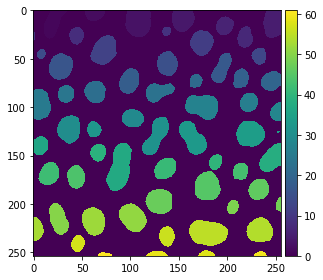

In [6]:
result = w.get("labeled")

imshow(result)